# Pandas - der optimale in-memory Speicherplatz

In Python/Pandas werden die Datentypen und die Größe des Speicherplatzes automatisch festgelegt. Die Festlegung erfolgt dabei nicht immer optimal. Weiterhin können aufgrund fehlender Werte die Datentypen und Speicherplätze zu groß gewählt werden. Nach Bereinigung der fehlenden Werte sind die Datentypen/Speicherplätze anzupassen.

Die offizielle Dokumentation in Pandas zu diesem Thema findest du unter folgendem Link:

https://pandas.pydata.org/docs/user_guide/scale.html#use-efficient-datatypes

In diesem Notebook schauen wir uns folgende Themen an:
        
                                                        - Wie identifiziere ich die richtigen Datentypen?
                                                        - Wie identifiziere ich den richtigen Speicherplatz?
                                                        
                                                        
## Wie identifiziere ich die richtigen Datentypen?

In [ ]:
# benötigte bib importieren
    
import pandas as pd 
import seaborn as sns
import numpy as np

In [ ]:
sns.get_dataset_names()

In [ ]:
# datensatz laden

df = sns.load_dataset('titanic')
df 

Weitere Informationen:  
**https://en.wikipedia.org/wiki/Passengers_of_the_Titanic#Third_class_2**

Survived: Outcome of survival (0 = No; 1 = Yes)  
Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)  
Name: Name of passenger  
Sex: Sex of the passenger  
Age: Age of the passenger (Some entries contain NaN)  
SibSp: Number of siblings and spouses of the passenger aboard  
Parch: Number of parents and children of the passenger aboard  
Ticket: Ticket number of the passenger  
Fare: Fare paid by the passenger  
Cabin: Cabin number of the passenger (Some entries contain NaN)  
Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)  


In [ ]:
df.info()

Die Spalten 'class' und 'deck' wurden automatisch als Datentyp 'category' deklariert!

In [ ]:
# datentypen in erfahrung bringen
df.dtypes[['age', 'alive']]   # Wenn gezielt Spalten zu betrachten sind
df.dtypes

In [ ]:
# Spalte mit Objekten näher untersuchen
# Wieviele Werte gibt es und wie oft werden diese verwendet?
df['pclass'].value_counts()    # Summe nach Werten (alle)
df['pclass'].size              # Gesamtsumme Werte
df['pclass'].count()           # Gesamtsumme Werte
    

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df['pclass'].unique().size)
print(df['pclass'].unique())

__Erste Erkenntnisse:__



__Ergebnis:__



## Wie identifiziere ich den richtigen Speicherplatz?  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.memory_usage.html

In [ ]:
# schauen, ob der richtige Speicherplatz festgelegt ist  - memory_usage() --> Rückgabewert: speicherplatz in bytes

df.memory_usage(deep=True) 

# was ist deep=True?

# hier werden Spalten mit dem Datentyp Object näher angeschaut und geprüft wie groß deren 
# "system-level memory consumption" ist.

In [ ]:
# Gesamter Speicherbedarf des Datensatzes
df.memory_usage(deep=True).sum()

In [ ]:
# ohne deep=True

df.memory_usage()

In [ ]:
# Oberflächige Speichernutzung! (ohne deep=True)
df.memory_usage().sum()

In [ ]:
# Verhältnis Tatsächlicher zu oberflächlicher Speichernutzung
vsp = df.memory_usage(deep=True).sum() / df.memory_usage().sum()
print(f'{vsp:.4f}')

In [ ]:
# Um später die Speicherplatzersparniss erreichen zu können, arbeiten wir im weiteren mit einer Kopie. 
# Diese Kopie enthält die optimalen Speicherplätze und Datentypen

df_opti = df.copy()
df_opti

In [ ]:
df['survived'].value_counts()

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df['survived'].unique().size)
print(df['survived'].unique())

In [ ]:
# Datentyp von survived (dtype = int64) anpassen in type 'category'
df_opti['survived'] = df_opti['survived'].astype('category') # Vergleich category zu bool
#df_opti['survived'] = df_opti['survived'].astype('bool')

df_opti.dtypes

In [ ]:
# erster Check zur Optimierung

df_opti.memory_usage(deep=True)

# wow von 7128 auf 1015! Eine Reduzierung, bei category, des Speicherplatzes um ca. 1/7!

In [ ]:
df_opti


In [ ]:
print(df_opti.memory_usage(deep=True).sum())
df_opti

In [ ]:
# Verhältnis ursprünglicher zum 1. optimierten Speicherplatzbedarf 
vsp = df_opti.memory_usage(deep=True).sum() / df.memory_usage(deep=True).sum()
print(f'{vsp:.4f}')

In [ ]:
# Datentyp von pclass (dtype = int64) anpassen in type 'category'
df_opti['pclass'] = df_opti['pclass'].astype('category')
df_opti.dtypes

In [ ]:
df_opti.memory_usage(deep=True)

In [ ]:
print(df_opti.memory_usage(deep=True).sum())
df_opti

In [ ]:
# Verhältnis ursprünglicher zum 1. optimierten Speicherplatzbedarf 
vsp = df_opti.memory_usage(deep=True).sum() / df.memory_usage(deep=True).sum()
print(f'{vsp:.4f}')

Mögliche Datentypen in NumPy:  

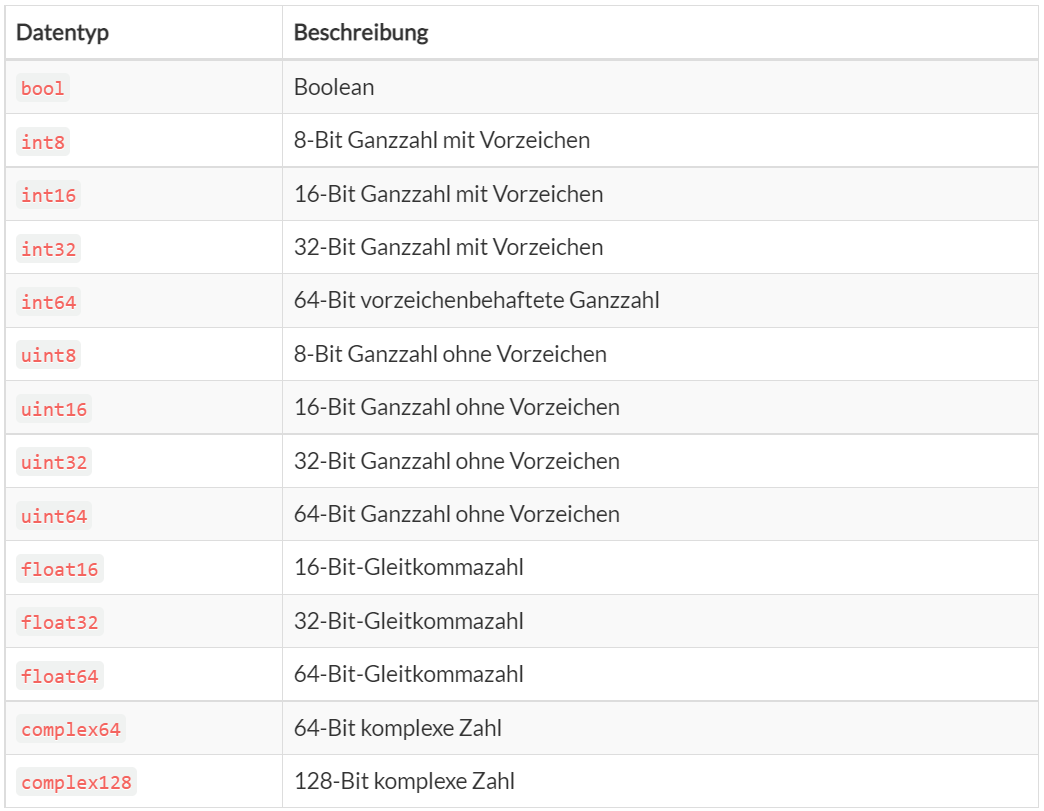


In [ ]:
pi16 = np.float16(np.pi)
#pi16 = np.float16(np.pi*1000)   # Beispiel für die Beschränkung des Wertebereichs
print('float16 : ', pi16)
pi32 = np.float32(np.pi)
#pi32 = np.float32(np.pi*1000)
print('float32 : ', pi32)
pi64 = np.float64(np.pi)
#pi64 = np.float64(np.pi*1000)
print('float64 : ', pi64)


In [ ]:
num8 = np.int8(128)       # -128 .. 127
#num8 = np.int8(384)
#num8 = np.int8(-128)
#num8 = np.int8(-129)
print('int8    : ', num8)
#num8new = np.array(128).astype(int)  # Automatische Typzuweisung!
#print('num8new :', num8new , type(num8new))
unum8 = np.uint8(256)
#unum8 = np.uint8(-123456789)
#unum8 = np.uint8(-129)
print('uint8   : ',unum8)

In [ ]:
num16 = np.int16(123456789)
#num16 = np.int16(32767)       # Wertebereich -32768 bis 32767
print('int16   : ', num16)
num16 = np.uint16(123456789)
#num16 = np.uint16(65535)      # Wertebreich 0 bis 65535 (65536 möglich Werte bei 16 Bit)
print('uint16  : ', num16)
num32 = np.int32(1234567890)
#num32 = np.int32(12345678901)
#num32 = np.array(12345678911).astype(np.int32)   # Wenn der Überlauf keinen Fehler erzeugen soll
print('int32   : ', num32)
num32 = np.uint32(1234567890)
#num32 = np.uint32(123456789011)     # Fehler bei Überlauf
print('uint32  : ', num32)
num64 = np.int64(1234567890123456789)
num64 = np.int64(9223372036854775808-1)   # Grenze für int64 Datentyp 
print('int64   : ', num64)
num64 = np.uint64(1234567890123456789)
num64 = np.uint64(18446744073709551616-1)   # Grenze für uint64 Datentyp
print('uint64  : ', num64)

In [ ]:
cnum64 = np.complex64(1234567890123456789)
print('complex64  : ', cnum64)
cnum128 = np.complex128(1234567890123456789)
print('complex128  : ', cnum128)

In [ ]:
# Optimierung des Speicherplatzes bei den floats

df_opti[["age","fare"]] = df_opti[["age","fare"]].apply(pd.to_numeric, downcast="float")
df_opti.dtypes 

In [ ]:
print(df_opti.memory_usage(deep=True).sum())
df_opti

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df['sex'].unique().size)
print(df['sex'].unique())

In [ ]:
df_opti['sex'] = df_opti['sex'].astype('category')

In [ ]:
print(df_opti.memory_usage(deep=True).sum())
df_opti.dtypes

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df['age'].unique().size)
print(df['age'].unique())

89 verschiedene Werte und der Informationsinhalt machen keinen Sinn für eine Kategorisierung.  
Man kann also nur eine Reduzierung des Speicherplatzes über den Datentyp erreichen.  
Dieses wurde bereits am Anfang auf float32 optimiert!

Hätte im Vorfeld eine Datenbereinigung stattgefunden wäre auch ein Datentyp Integer ausreichend! (Das Alter wird normalerweise nicht als float dargestellt)

In [ ]:
# Zwingende Konvertierung versuchen
try:
    df_opti[["age"]] = df_opti[["age"]].astype('uint8')
except Exception as e:
    print(f'Konvertierung nicht möglich! ({e})')
df_opti.dtypes

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['sibsp'].unique().size)
print(df_opti['sibsp'].unique())
print(df_opti['parch'].unique().size)
print(df_opti['parch'].unique())

In [ ]:
df_opti[["sibsp", "parch"]] = df_opti[["sibsp", "parch"]].apply(pd.to_numeric, downcast="unsigned") # optimierter Datentyp
#df_opti[["sibsp", "parch"]] = df_opti[["sibsp", "parch"]].apply(pd.to_numeric, downcast="integer")
df_opti.dtypes

In [ ]:
# df_opti[['sibsp', 'parch']] = df_opti[['sibsp', 'parch']].astype('category')
# df_opti.dtypes

In [ ]:
print(df_opti.memory_usage(deep=True).sum())
df_opti.dtypes

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['fare'].unique().size)
print(df_opti['fare'].unique())

Wurde bereits auf den optimalen Datentyp 'float32' geändert.  
Sonst mit folgendem Kommando den optimalen datentyp ermitteln lassen.

In [ ]:
df_opti[["fare"]] = df_opti[["fare"]].apply(pd.to_numeric, downcast="float")
df_opti.dtypes

In [ ]:
print(df_opti.memory_usage(deep=True))

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['embarked'].unique().size)
print(df_opti['embarked'].unique())

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['class'].unique().size)
print(df_opti['class'].unique())

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['fare'].unique().size)
print(df_opti['fare'].unique())

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['who'].unique().size)
print(df_opti['who'].unique())

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['embark_town'].unique().size)
print(df_opti['embark_town'].unique())

In [ ]:
# wieviele verschiedene Werte gibt es?
print(df_opti['alive'].unique().size)
print(df_opti['alive'].unique())

Die Spalten 'embarked', 'who', 'embark_town' und 'alive' können in den Typ 'category' umgewandelt werden.

In [ ]:
df_opti[['embarked', 'who', 'embark_town', 'alive']] = df_opti[['embarked', 'who', 'embark_town', 'alive']].astype('category')
df_opti.dtypes

In [ ]:
print(df_opti.memory_usage(deep=True))
print(df_opti.memory_usage(deep=True).sum())
df_opti.dtypes

__Erkenntnis:__

Der Speicherplatz wurde von 64 auf 32 angepasst! 

In [ ]:
# gesamte in-memory-Speicherplatzreduzierung
# Verhältnis ursprünglicher zum 2. optimierten Speicherplatzbedarf 
vsp = df.memory_usage(deep=True).sum() / df_opti.memory_usage(deep=True).sum()
print(f'{vsp:.4f}')
reduction = (df.memory_usage(deep=True).sum()-df_opti.memory_usage(deep=True).sum())/df.memory_usage(deep=True).sum()

print(f"Reduktion um: {reduction*100:0.2f}%")

In [ ]:

df_opti["NEW"] = round(df_opti["age"]).astype(dtype="Int8")
#df_opti["NEW"] = round(df_opti["NEW"]).astype(dtype=np.uint8) # NumPy kann NA nicht konvertieren --> Fehler!
#df_opti["NEW"] = round(df_opti["age"]).apply(pd.to_numeric, downcast="unsigned")
df_opti.head(40)
df_opti.dtypes

In [ ]:
#df_opti[["NEW"]] = df_opti[["NEW"]].apply(pd.to_numeric, downcast="integer")   # to_numeric stört sich an NaN-Werten!
#df_opti["NEW"] = round(df_opti["NEW"]).apply(pd.to_numeric, downcast="unsigned")
print(df_opti.dtypes)
print(df_opti['NEW'].unique())
df_opti.head(20)